Decision Tree Classifier to predict whether a customer will purchase a product or service based on demographic and behavioural data.UCI Machine Learning Bank Marketing dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('bank.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.shape

(49732, 17)

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Analysis
1. Missing Values
2. Explore about Numerical Variables
3. Explore Categorical Variables
4. Finding Relationships between features

<Axes: >

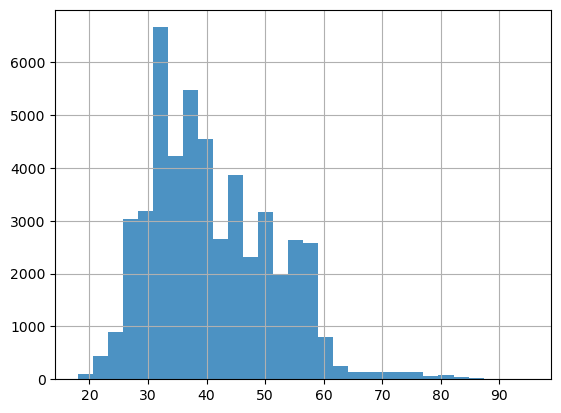

In [11]:
df['age'].hist(bins=30,alpha=0.8)

Observation: Majority of the people are between 30-40 age group.

In [12]:
df.job.value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [13]:
job_name=df.job.value_counts().index
job_name

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [14]:
job_values=df.job.value_counts().values
job_values

array([10678, 10427,  8365,  5649,  4571,  2494,  1762,  1655,  1431,
        1352,  1022,   326], dtype=int64)

([<matplotlib.patches.Wedge at 0x295796d7ac0>,
 [Text(0.8590978628878795, 0.6869867989863258, 'blue-collar'),
  Text(-0.46549573808377265, 0.9966512518558556, 'management'),
  Text(-1.0984406538155085, -0.058550235228891065, 'technician'),
  Text(-0.6500778749298189, -0.8873549213965801, 'admin.'),
  Text(0.014661424734733556, -1.099902287762303, 'services'),
  Text(0.48797637426087875, -0.9858392658862838, 'retired'),
  Text(0.7323111168690507, -0.8208047442053461, 'self-employed'),
  Text(0.8911179605544273, -0.6449099009763446, 'entrepreneur'),
  Text(0.999165392039003, -0.4600744715277578, 'unemployed'),
  Text(1.0642312480935245, -0.27822985206713385, 'housemaid'),
  Text(1.0938553552429124, -0.11610539094461535, 'student'),
  Text(1.0997667559029072, -0.02265132691026766, 'unknown')],
 [Text(0.46859883430247967, 0.37472007217435943, '21.5%'),
  Text(-0.2539067662275123, 0.5436279555577394, '21.0%'),
  Text(-0.5991494475357318, -0.03193649194303149, '16.8%'),
  Text(-0.35458793177

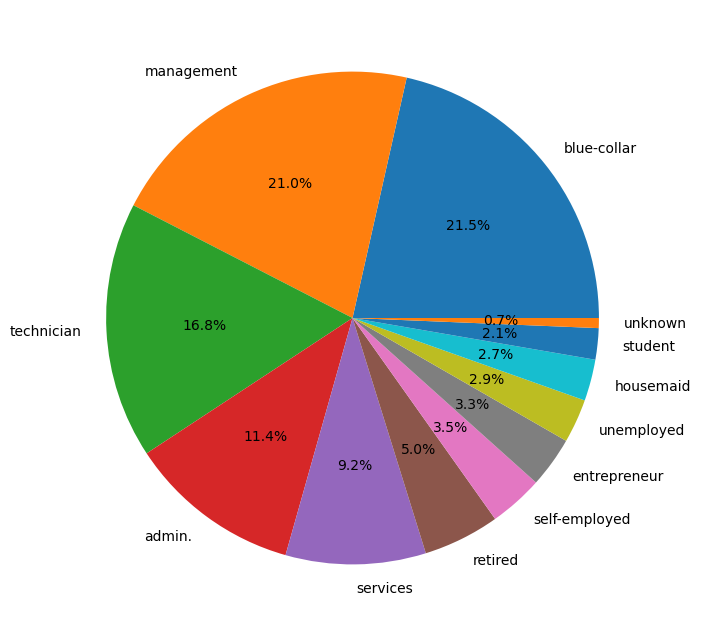

In [15]:
plt.figure(figsize=(10,8))
plt.pie(job_values,labels=job_name,autopct='%1.1f%%')

<Axes: xlabel='job', ylabel='count'>

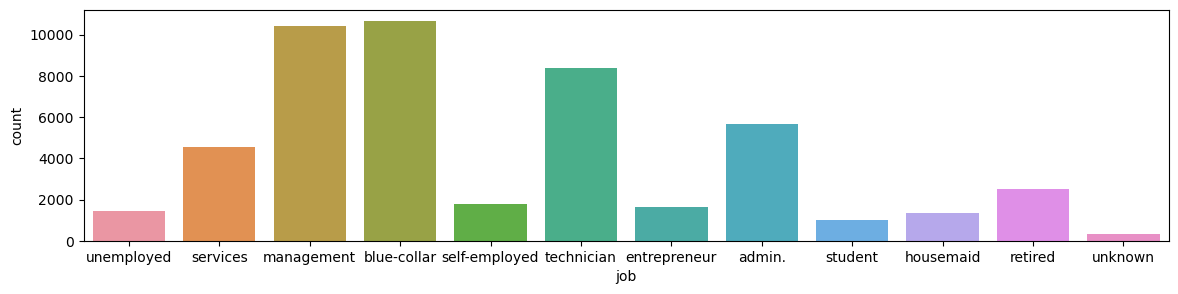

In [16]:
plt.figure(figsize=(14,3))
sns.countplot(x='job',data=df)

In [17]:
df.marital.value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

([<matplotlib.patches.Wedge at 0x2957997f0a0>,
 [Text(-0.35125216525508723, 1.042411586852148, 'married'),
  Text(-0.04098802758622603, -1.0992360900164218, 'single'),
  Text(1.0285993850501876, -0.38985036241406285, 'divorced')],
 [Text(-0.19159209013913847, 0.5685881382829897, '60.3%'),
  Text(-0.022357105956123287, -0.5995833218271391, '28.1%'),
  Text(0.561054210027375, -0.21264565222585244, '11.5%')])

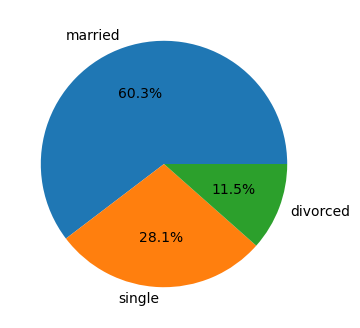

In [18]:
marital_status=df.marital.value_counts().index
ms_values=df.marital.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(ms_values,labels=marital_status,autopct='%1.1f%%')

Observation: Maximum people are married

In [19]:
df.education.value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

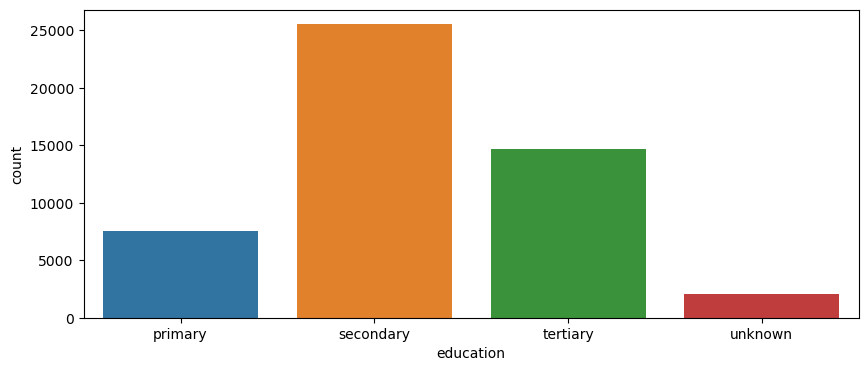

In [20]:
education_status=df.education.value_counts().index
education_values=df.education.value_counts().values
plt.figure(figsize=(10,4))
sns.countplot(x='education',data=df)

Observation: Most of the people have atleast secondary education

In [21]:
df.default.value_counts()

no     48841
yes      891
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

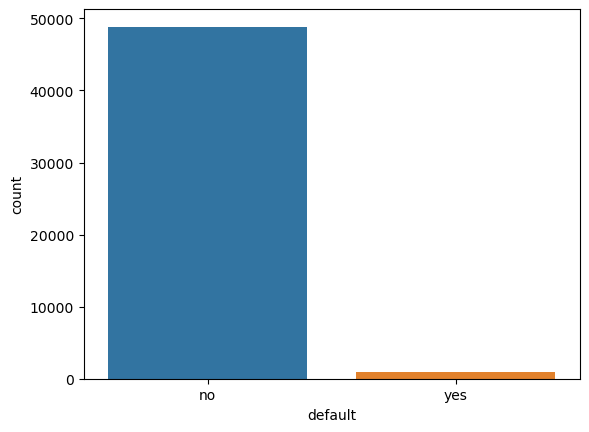

In [22]:
sns.countplot(x='default',data=df)

Observation: Most of the people do not have any credit in default.There is a very small amount of population having credits in default.

In [23]:
df.housing.value_counts()

yes    27689
no     22043
Name: housing, dtype: int64

([<matplotlib.patches.Wedge at 0x29579aa3370>,
 [Text(-0.19512508247549232, 1.0825554037502803, 'yes'),
  Text(0.19512508247549215, -1.0825554037502805, 'no')],
 [Text(-0.10643186316845034, 0.5904847656819711, '55.7%'),
  Text(0.10643186316845026, -0.5904847656819711, '44.3%')])

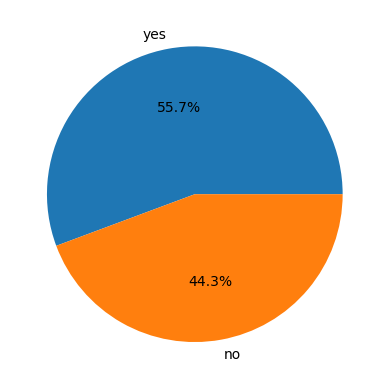

In [24]:
hl_status=df.housing.value_counts().index
hl_values=df.housing.value_counts().values
plt.pie(hl_values,labels=hl_status,autopct='%1.1f%%')

Observation: 56% of the population has housing loans

In [25]:
df.loan.value_counts()

no     41797
yes     7935
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

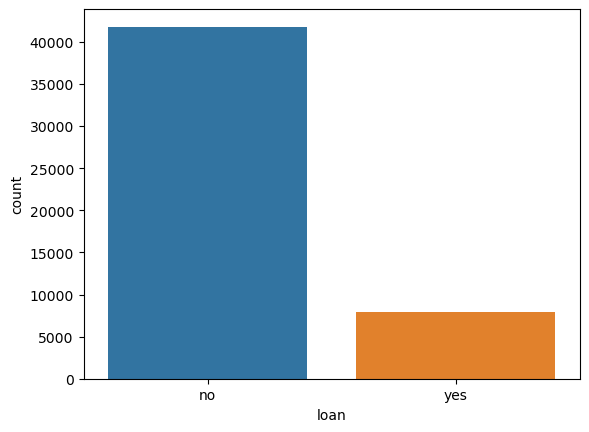

In [26]:
sns.countplot(x='loan',data=df)

Observation: A big amount of population do not have any personal loans.

In [27]:
df.contact.value_counts()

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

([<matplotlib.patches.Wedge at 0x29579b6de70>,
 [Text(-0.4904037091339709, 0.9846340447433471, 'cellular'),
  Text(0.2822615785927258, -1.0631690370069768, 'unknown'),
  Text(1.0775041402199559, -0.22132516307201439, 'telephone')],
 [Text(-0.2674929322548932, 0.5370731153145529, '64.7%'),
  Text(0.15396086105057769, -0.5799103838219873, '28.8%'),
  Text(0.5877295310290668, -0.12072281622109875, '6.4%')])

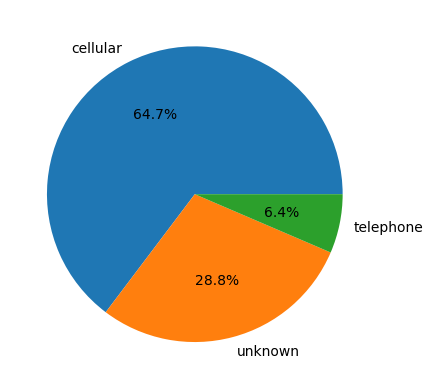

In [28]:
c_status=df.contact.value_counts().index
c_values=df.contact.value_counts().values
plt.pie(c_values,labels=c_status,autopct='%1.1f%%')

Observations: 64% of the population can be contacted through cellphones.

In [29]:
df.campaign.value_counts()

1     19278
2     13769
3      6079
4      3847
5      1931
6      1446
7       810
8       596
9       357
10      293
11      223
12      176
13      150
14      103
15       93
16       87
17       76
18       58
19       47
20       46
21       37
25       26
22       25
23       24
24       23
28       19
29       17
31       13
26       13
32       11
27       10
30        9
33        6
34        5
36        4
35        4
38        3
43        3
50        3
37        2
41        2
44        2
55        1
46        1
58        1
63        1
51        1
39        1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

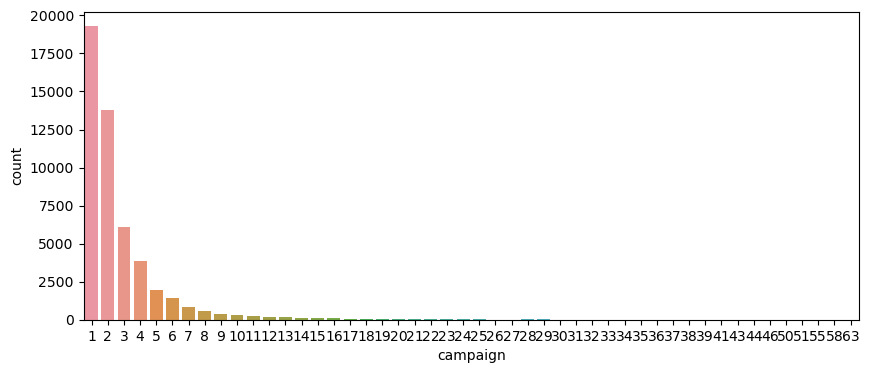

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(x='campaign',data=df)

Observation:The above plot shows the number of contacts performed during this campaign and for client

In [31]:
df.poutcome.value_counts()

unknown    40664
failure     5391
other       2037
success     1640
Name: poutcome, dtype: int64

([<matplotlib.patches.Wedge at 0x2957a3922c0>,
 [Text(-0.9244076949284146, 0.5962133959893348, 'unknown'),
  Text(0.7623371647421137, -0.7929956161625079, 'failure'),
  Text(1.038533649192687, -0.36255738786366076, 'other'),
  Text(1.094102192974564, -0.11375584085333881, 'success')],
 [Text(-0.5042223790518624, 0.32520730690327343, '81.8%'),
  Text(0.4158202716775165, -0.4325430633613679, '10.8%'),
  Text(0.5664728995596474, -0.1977585751983604, '4.1%'),
  Text(0.5967830143497621, -0.06204864046545753, '3.3%')])

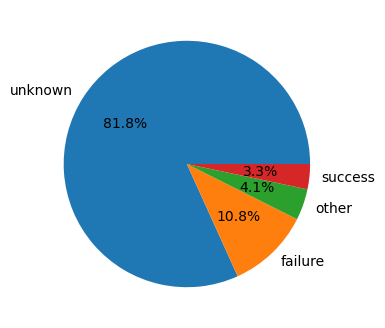

In [32]:
outcome_status=df.poutcome.value_counts().index
outcome_values=df.poutcome.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(outcome_values,labels=outcome_status,autopct='%1.1f%%')

Observation: It can be analyzed that the outcomes of the previous campaign were not so good,with very little success rate

In [33]:
df.y.value_counts()

no     43922
yes     5810
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

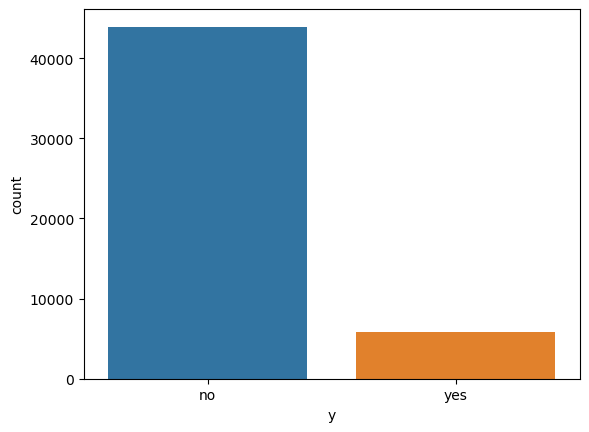

In [34]:
sns.countplot(x='y',data=df)

Observation: We can analyze that most of the clients did not subscribe a term deposit,or in simple words,did not buy the product or service

In [35]:
df.replace({'housing':{'no':0,'yes':1}},inplace=True)
df.replace({'loan':{'no':0,'yes':1}},inplace=True)

In [36]:
df['h_and_l']=0
df['no_loan']=0

In [37]:
df['h_and_l']=df['loan']+df['housing']
df['h_and_l']=df['h_and_l']==2

In [38]:
df['no_loan']=df['loan']+df['housing']
df['no_loan']=df['no_loan']==0

In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,h_and_l,no_loan
0,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no,False,True
1,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no,True,False
2,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no,False,False
3,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no,True,False
4,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes,False,True
49728,71,retired,divorced,primary,no,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes,False,True
49729,72,retired,married,secondary,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes,False,True
49730,57,blue-collar,married,secondary,no,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no,False,True


In [40]:
df.h_and_l.value_counts()

False    44959
True      4773
Name: h_and_l, dtype: int64

([<matplotlib.patches.Wedge at 0x2957a43ab90>,
 [Text(-1.05037722774329, 0.32666141406404414, 'False'),
  Text(1.0503772048051008, -0.32666148782160337, 'True')],
 [Text(-0.5729330333145217, 0.17817895312584223, '90.4%'),
  Text(0.5729330208027822, -0.17817899335723816, '9.6%')])

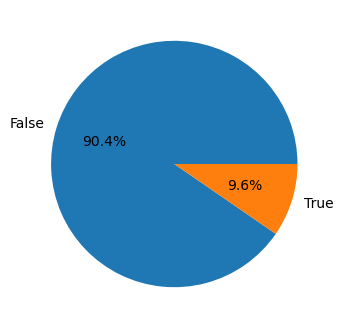

In [41]:
handl_status=df.h_and_l.value_counts().index
handl_values=df.h_and_l.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(handl_values,labels=handl_status,autopct='%1.1f%%')

Observation : Only 9% of the population has both housing and personal loans

In [42]:
df.no_loan.value_counts()

False    30851
True     18881
Name: no_loan, dtype: int64

([<matplotlib.patches.Wedge at 0x2957a2017b0>,
 [Text(-0.4060454614503268, 1.022314571565715, 'False'),
  Text(0.4060454614503265, -1.0223145715657151, 'True')],
 [Text(-0.22147934260926913, 0.5576261299449353, '62.0%'),
  Text(0.22147934260926896, -0.5576261299449354, '38.0%')])

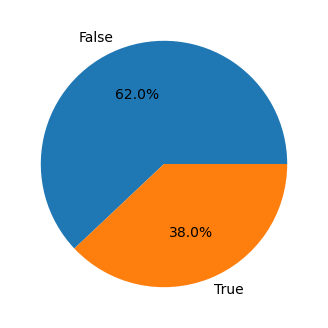

In [43]:
no_status=df.no_loan.value_counts().index
no_values=df.no_loan.value_counts().values
plt.figure(figsize=(10,4))
plt.pie(no_values,labels=no_status,autopct='%1.1f%%')

Observation: 37% of the population do not have any kind of loans.

In [44]:
df.replace({'marital':{'single':0,'divorced':1,'married':2}},inplace=True)
df.replace({'education':{'unknown':0,'primary':1,'secondary':2,'tertiary':3}},inplace=True)
df.replace({'default':{'no':0,'yes':1}},inplace=True)
df.replace({'contact':{'unknown':0,'telephone':1,'cellular':2}},inplace=True)


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['age']=le.fit_transform(df['age'])
df['month']=le.fit_transform(df['month'])

In [46]:
X=df.drop(['pdays','previous','poutcome','no_loan','h_and_l','y'],axis=1)
Y=df['y']

In [47]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,12,10,2,1,0,1787,0,0,2,19,10,79,1
1,15,7,2,2,0,4789,1,1,2,11,8,220,1
2,17,4,0,3,0,1350,1,0,2,16,0,185,1
3,12,4,2,3,0,1476,1,1,0,3,6,199,4
4,41,1,2,2,0,0,1,0,0,5,8,226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,9,2,3,0,825,0,0,2,17,9,977,3
49728,53,5,1,1,0,1729,0,0,2,17,9,456,2
49729,54,5,2,2,0,5715,0,0,2,17,9,1127,5
49730,39,1,2,2,0,668,0,0,1,17,9,508,4


In [48]:
df.y.value_counts()

no     43922
yes     5810
Name: y, dtype: int64

Splitting the data into training data & Test data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
print(X.shape,X_train.shape, X_test.shape)

(49732, 13) (34812, 13) (14920, 13)


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['age','balance','day','duration']]=sc.fit_transform(X_train[['age','balance','day','duration']])
X_test[['age','balance','day','duration']]=sc.fit_transform(X_test[['age','balance','day','duration']])

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=2529)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=2529)

In [52]:
Y_pred=dt.predict(X_test)
Y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [54]:
confusion_matrix(Y_test,Y_pred)

array([[12820,   300],
       [ 1349,   451]], dtype=int64)

In [55]:
accuracy_score(Y_test,Y_pred)

0.8894772117962466

In [56]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     13120
         yes       0.60      0.25      0.35      1800

    accuracy                           0.89     14920
   macro avg       0.75      0.61      0.65     14920
weighted avg       0.87      0.89      0.87     14920



In [57]:
report = classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

df = pd.DataFrame(report).transpose()

print(df)

              precision    recall  f1-score       support
Class 0        0.904792  0.977134  0.939573  13120.000000
Class 1        0.600533  0.250556  0.353587   1800.000000
accuracy       0.889477  0.889477  0.889477      0.889477
macro avg      0.752662  0.613845  0.646580  14920.000000
weighted avg   0.868085  0.889477  0.868877  14920.000000
